In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FixedLocator, MaxNLocator




In [32]:
icb_data = pd.read_csv("../icb_data_all_maps_vaccs_programmes-2.csv")
icb_gdf = gpd.read_file("../Integrated_Care_Boards_April_2023_EN_BFC_-2681674902471387656.geojson")
map_meta = pd.read_csv("../report_standards_meta_data_2.csv") 

In [33]:
geo_icb_df = icb_data.merge(icb_gdf, on=["ICB23CD"], how='left')

In [34]:
gdf_plot = gpd.GeoDataFrame(geo_icb_df)

In [35]:
map_meta.head(10)

,report,report_name,geography,low,high,colour_scheme,target,average,target_text
0,sixty_five_years_and_over,Flu 65 years and over,ICB,70,90,plasma,75,78,WHO Target
1,sixty_five_years_and_under,Flu 64 years and under,ICB,30,70,Blues,60,50,Optimal Peformance Standard
2,MMR_2_dose,MMR 2 dose,ICB,80,95,RdYlGn,80,85,Optimal Peformance Standard
3,maternal_pertussis_march_24,Maternal Pertussis March 24,ICB,60,70,Blues,70,60,Optimal Peformance Standard
4,maternal_pertussis_march_25,Maternal Pertussis March 25,ICB,60,80,viridis,75,80,WHO Target


C:\Users\NM2.ABTUHXA0\AppData\Local\Temp\ipykernel_22352\355783394.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colorbar_ax.set_yticklabels([f"{int(tick)}%" for tick in colorbar_ax.get_yticks()])
C:\Users\NM2.ABTUHXA0\AppData\Local\Temp\ipykernel_22352\355783394.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colorbar_ax.set_yticklabels([f"{int(tick)}%" for tick in colorbar_ax.get_yticks()])
C:\Users\NM2.ABTUHXA0\AppData\Local\Temp\ipykernel_22352\355783394.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colorbar_ax.set_yticklabels([f"{int(tick)}%" for tick in colorbar_ax.get_yticks()])
C:\Users\NM2.ABTUHXA0\AppData\Local\Temp\ipykernel_22352\355783394.py:22: UserWarning: set_ticklabels() should only be used with a fixed

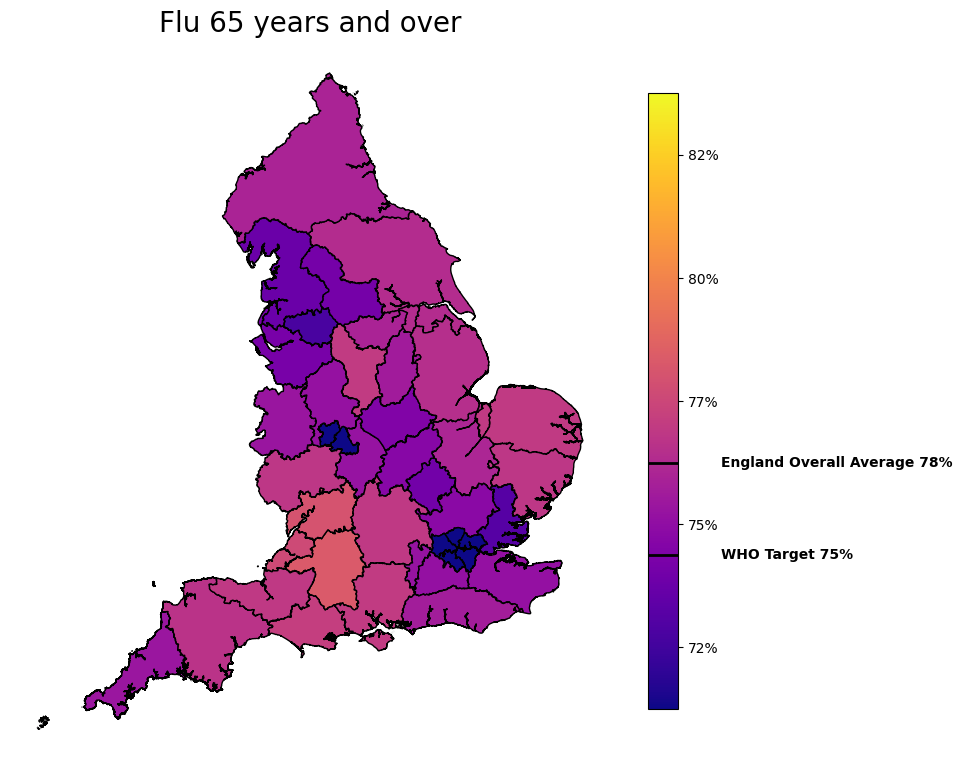

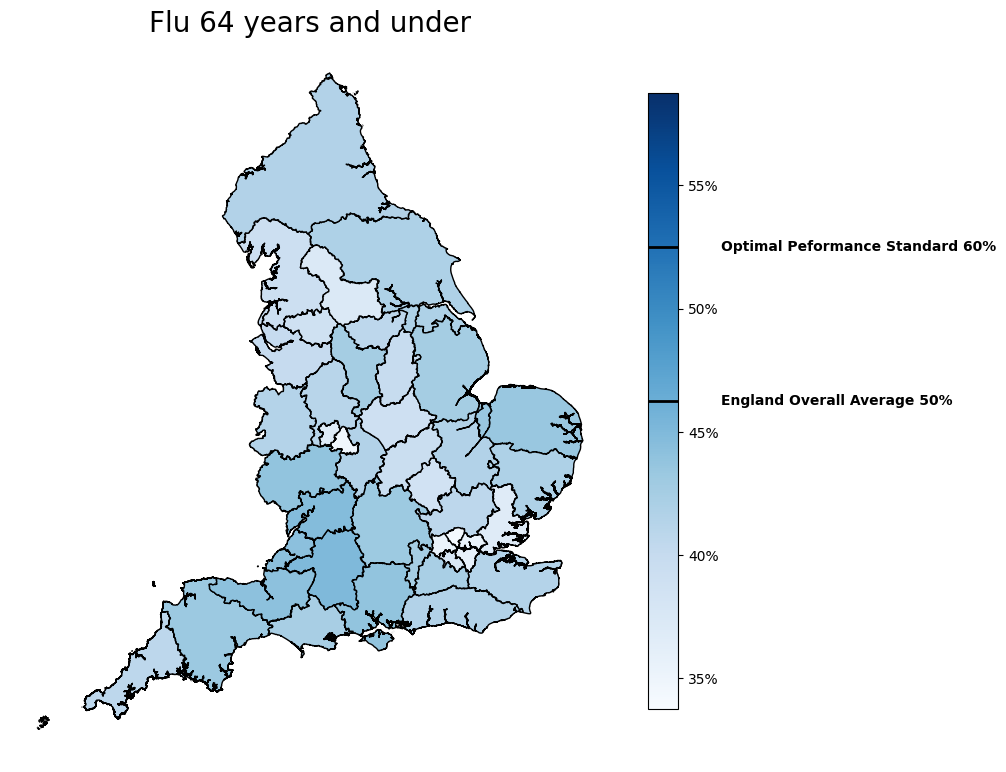

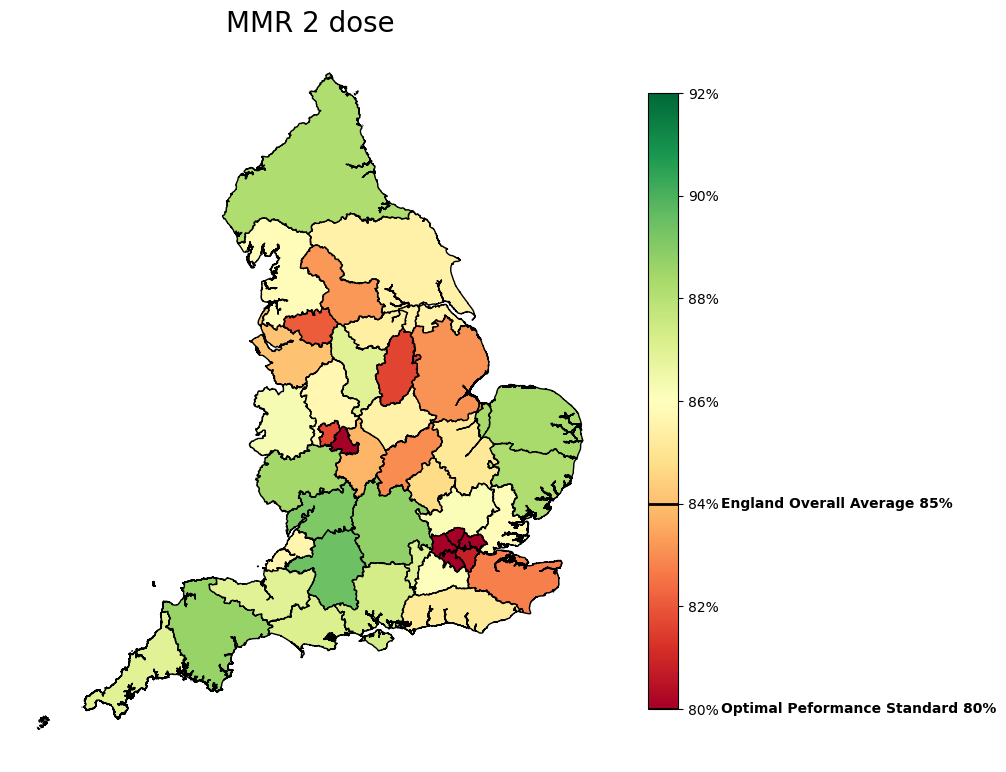

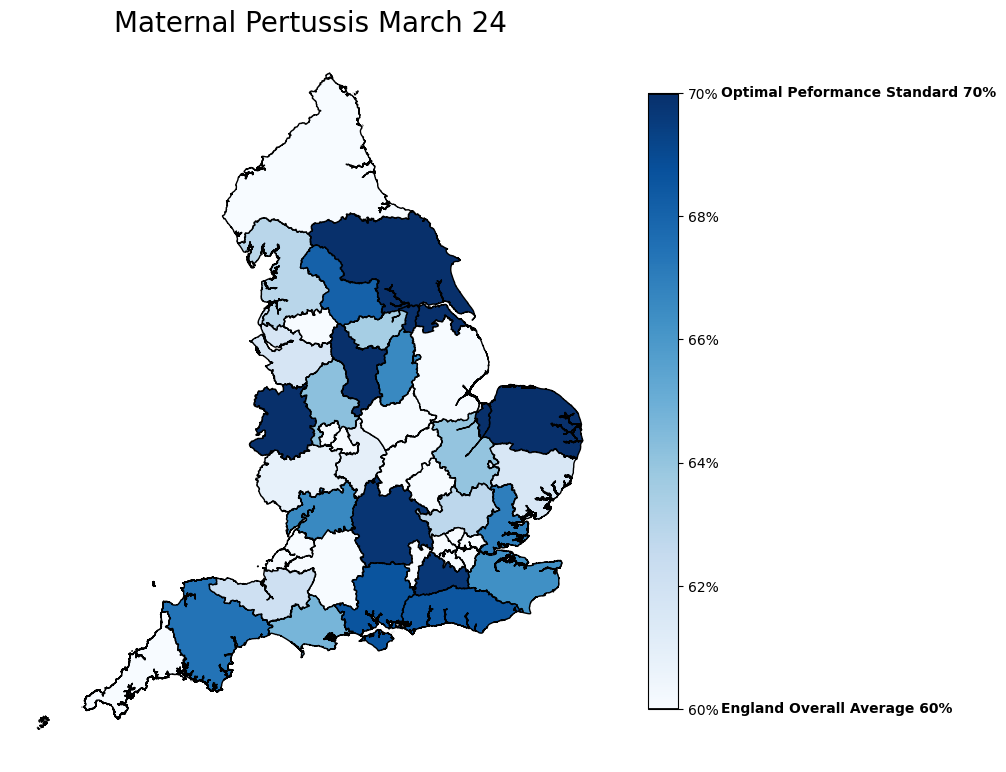

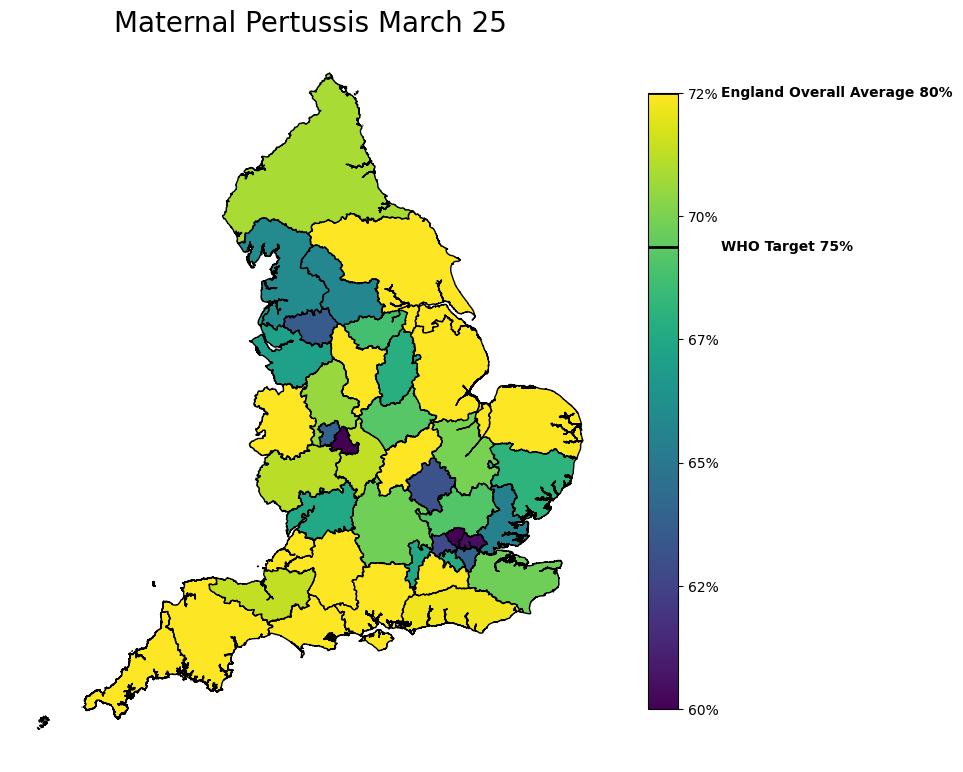

In [36]:
# Choropleth map loop

# Main loop which takes each row in the control csv and passes the values for each arguemnet. row['low'] will pass the low value for the row/report we loop over
for index,row in map_meta.iterrows():
    if row['geography'] == 'ICB':
        ax = gdf_plot.plot(
            column= row['report'],
            vmin = row['low'],
            vmax = row['high'],
            legend=True,
            legend_kwds={"orientation": "vertical", "shrink" : 0.8},
            figsize=(10, 10),
            cmap=row['colour_scheme'],
            edgecolor = "black")

        # Margin configuration of main fig
        fig = ax.get_figure()
        fig.subplots_adjust(left=0.1, right=0.85) 

        # Accessing the colour bar from the figure and formatting the ticks to be percentages
        colorbar_ax = fig.axes[1]
        colorbar_ax.set_yticklabels([f"{int(tick)}%" for tick in colorbar_ax.get_yticks()])
        colorbar_ax.yaxis.set_major_locator(MaxNLocator(nbins=6))   
      
     # Drawing both horizontal lines for the averages
        for avg, label, colour_label in zip(
            [row['average'],  row['target']],
            ['England Overall Average' + " " + str(row['average']) + "%", row['target_text'] + " " + str(row['target']) + "%" ],
            ['black', 'black']):
            
            colorbar_ax.axhline(y=avg, color=colour_label, linewidth=2)
            colorbar_ax.text(
            2.4,
            avg,
            label,
            va='center',
            ha='left',
            color=colour_label,
            fontsize=10,
            fontweight='bold')
            
        ax.axis('off') 
        ax.set_title(row['report_name'], fontdict={'fontsize': 20, 'fontweight': 10})
